In [18]:
#importing libaries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [4]:
#importing data 
data=pd.read_csv(r"D:\Edge Download\Test_data.csv")
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [12]:
# Display basic information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20819 entries, 1 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           20819 non-null  int64  
 1   department            20819 non-null  object 
 2   region                20819 non-null  object 
 3   education             20819 non-null  object 
 4   gender                20819 non-null  object 
 5   recruitment_channel   20819 non-null  object 
 6   no_of_trainings       20819 non-null  int64  
 7   age                   20819 non-null  int64  
 8   previous_year_rating  20819 non-null  float64
 9   length_of_service     20819 non-null  int64  
 10  KPIs_met >80%         20819 non-null  int64  
 11  awards_won?           20819 non-null  int64  
 12  avg_training_score    20819 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.2+ MB


In [13]:
# Compute summary statistics for numerical columns
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,20819.000000,20819.000000,20819.000000,20819.00000,20819.000000,20819.000000,20819.000000,20819.000000
mean,39050.468178,1.251261,35.591095,3.34848,6.261732,0.362409,0.023344,63.433498
std,22646.036871,0.595103,7.565959,1.26225,4.147909,0.480708,0.150997,13.284129
min,3.000000,1.000000,20.000000,1.00000,1.000000,0.000000,0.000000,39.000000
25%,19419.500000,1.000000,30.000000,3.00000,3.000000,0.000000,0.000000,51.000000
50%,38933.000000,1.000000,34.000000,3.00000,5.000000,0.000000,0.000000,60.000000
75%,58808.500000,1.000000,39.000000,4.00000,8.000000,1.000000,0.000000,75.000000
max,78295.000000,9.000000,60.000000,5.00000,34.000000,1.000000,1.000000,99.000000


In [14]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
missing_values


employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

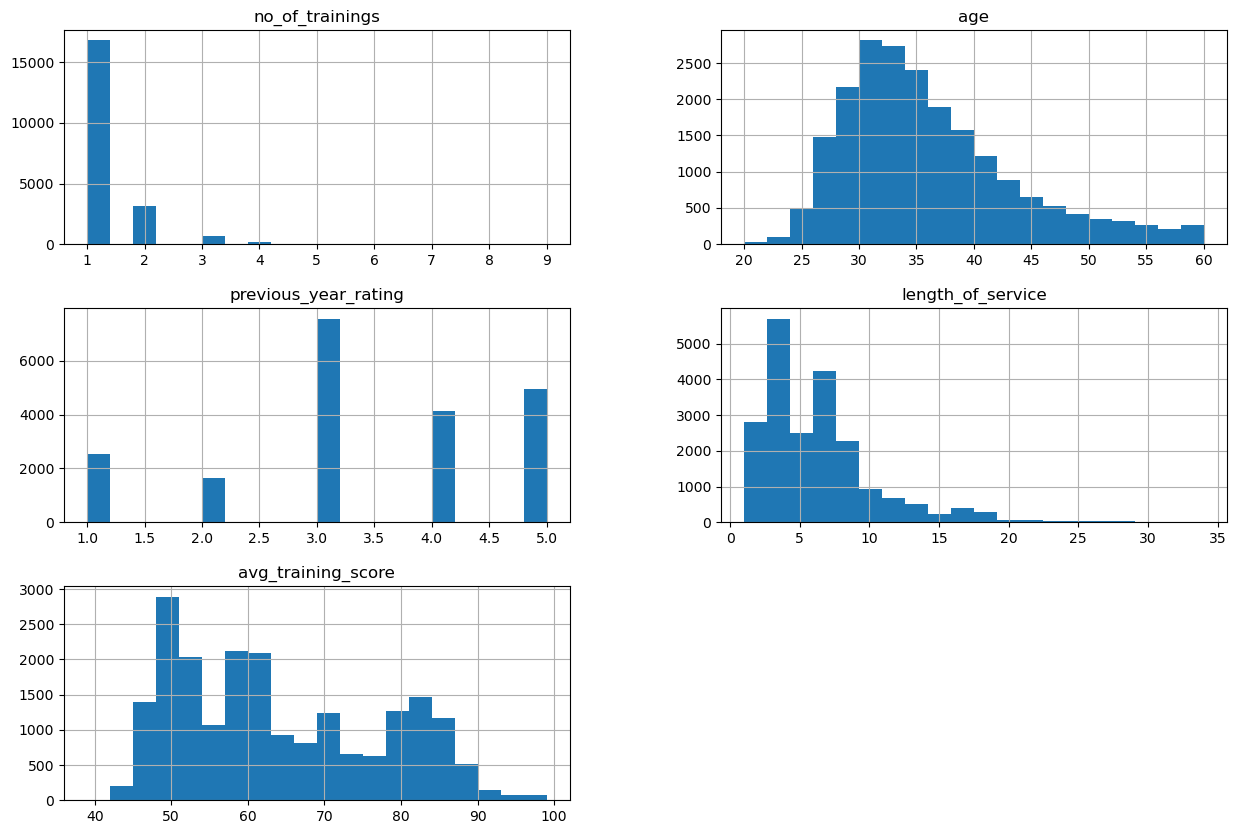

In [15]:
# Visualize the distribution of numerical features
numerical_features = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score']
data[numerical_features].hist(figsize=(15, 10), bins=20)
plt.show()

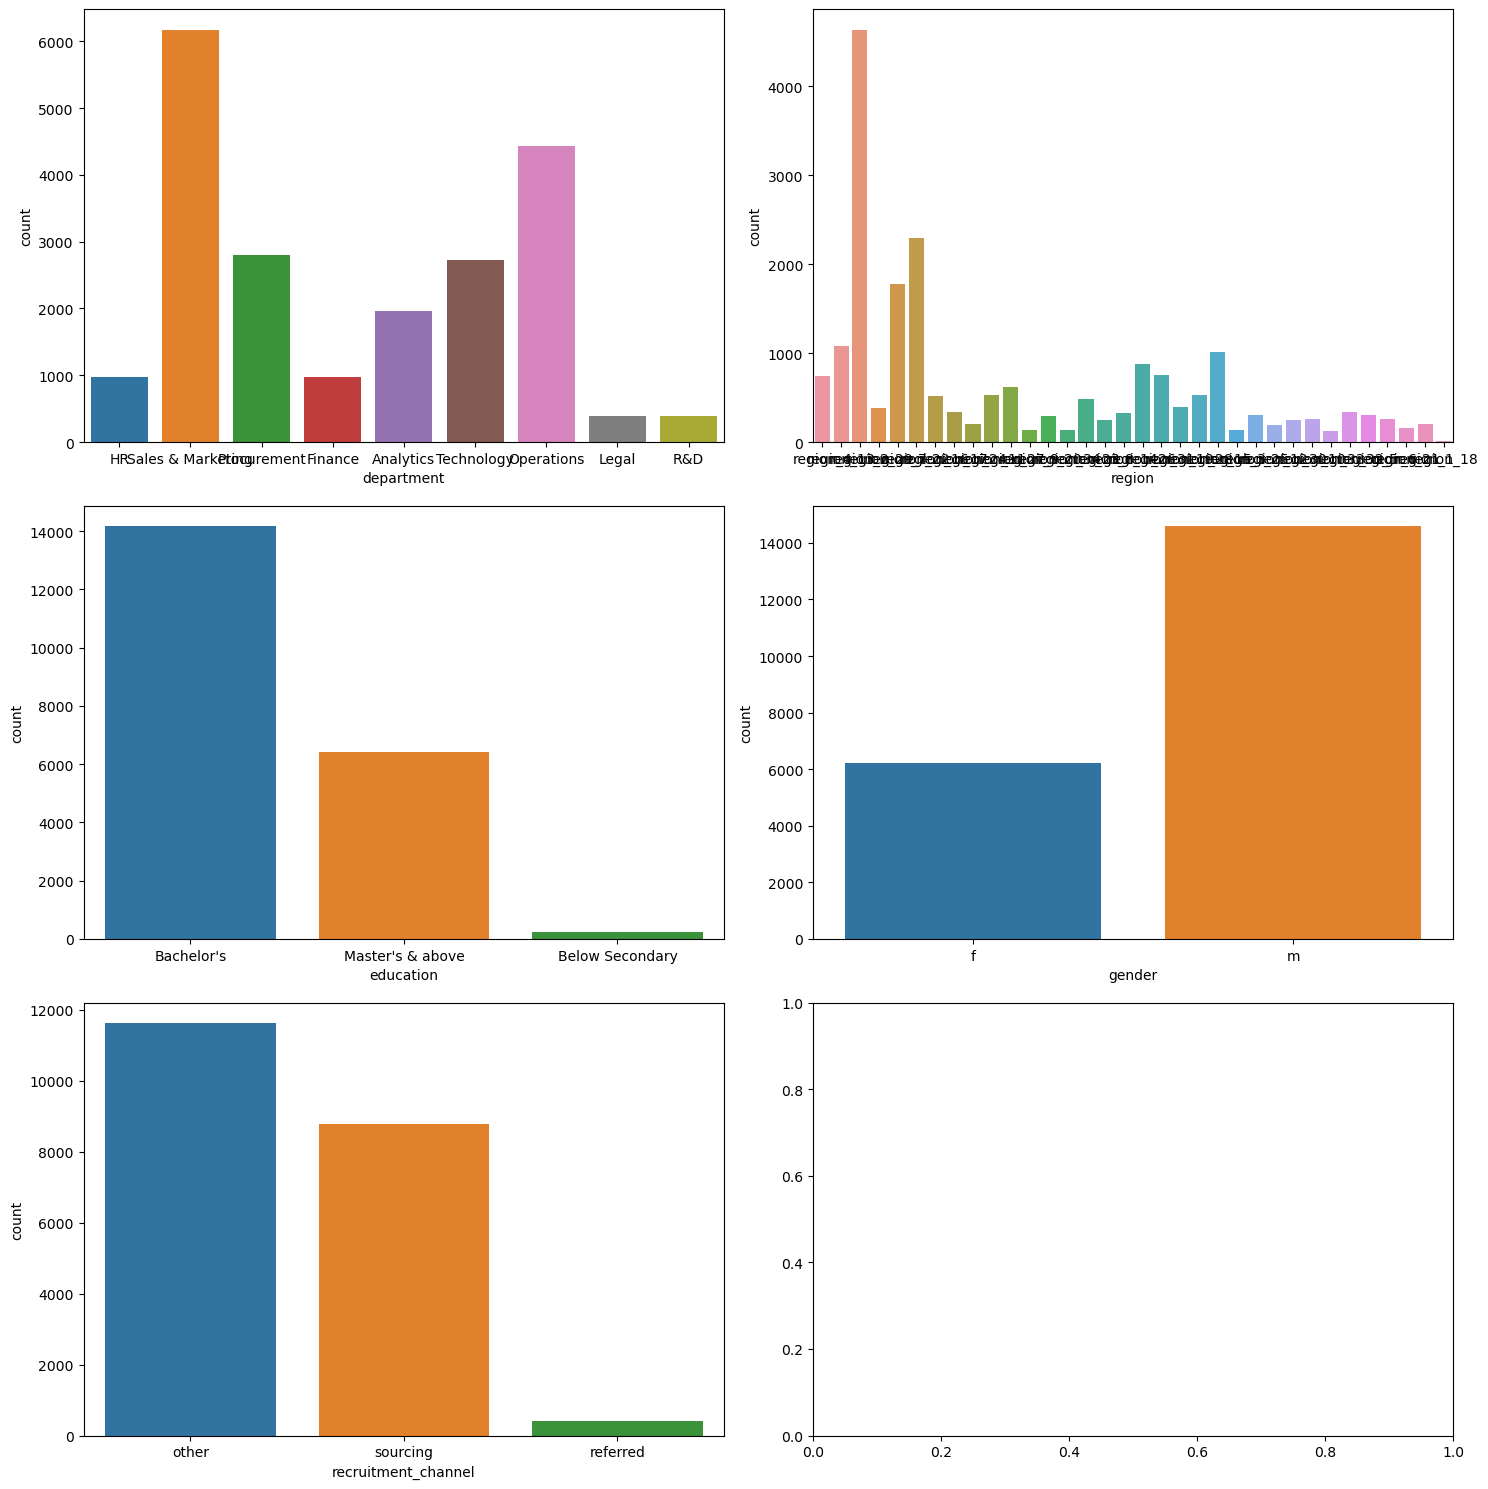

In [16]:
# Visualize the distribution of categorical features
categorical_features = ['department', 'region', 'education', 'gender', 'recruitment_channel']
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
for i, feature in enumerate(categorical_features):
    sns.countplot(data=data, x=feature, ax=axes[i // 2, i % 2])
plt.tight_layout()
plt.show()


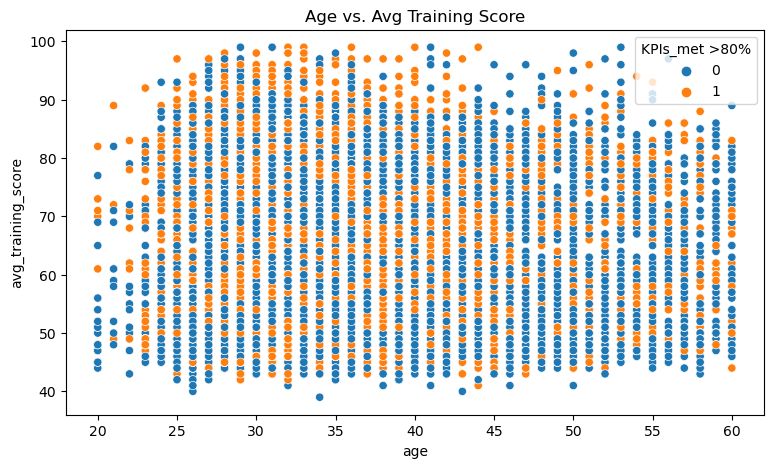

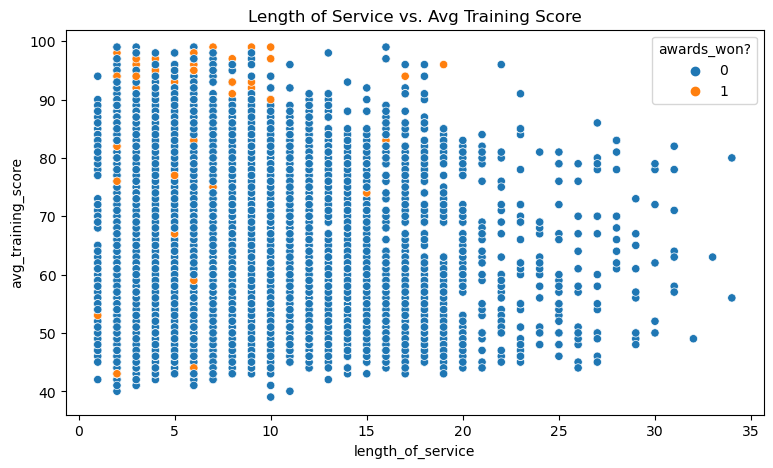

In [20]:
# Scatter plot between 'age' and 'avg_training_score'
sns.scatterplot(data=data, x='age', y='avg_training_score', hue='KPIs_met >80%')
plt.title('Age vs. Avg Training Score')
plt.show()

# Scatter plot between 'length_of_service' and 'avg_training_score'
sns.scatterplot(data=data, x='length_of_service', y='avg_training_score', hue='awards_won?')
plt.title('Length of Service vs. Avg Training Score')
plt.show()


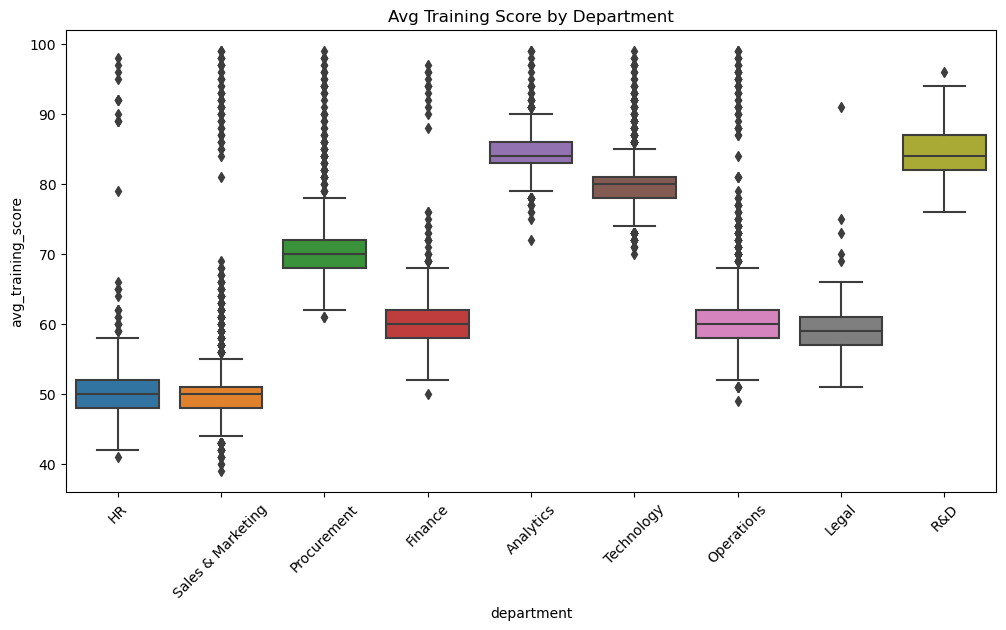

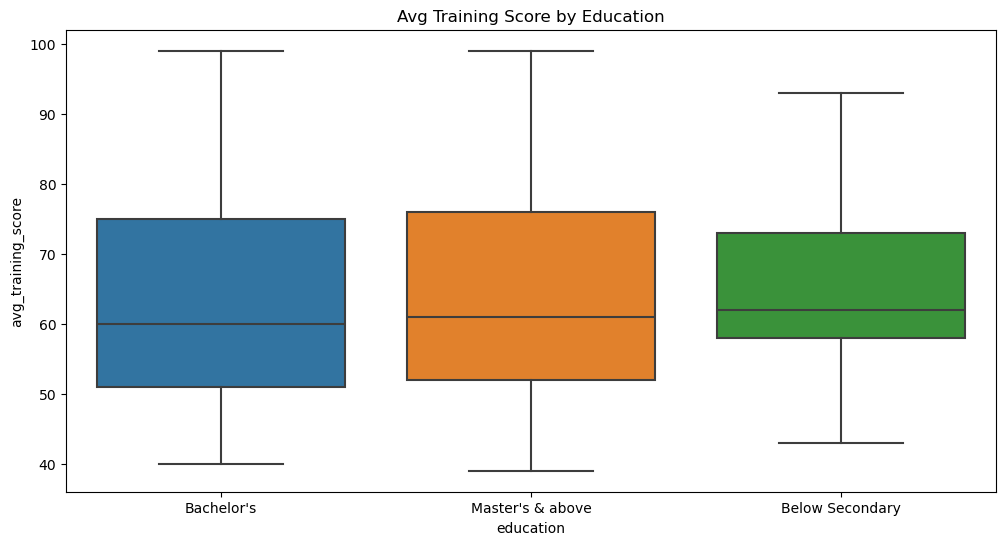

In [21]:
# Box plot of 'avg_training_score' by 'department'
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='department', y='avg_training_score')
plt.title('Avg Training Score by Department')
plt.xticks(rotation=45)
plt.show()

# Box plot of 'avg_training_score' by 'education'
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='education', y='avg_training_score')
plt.title('Avg Training Score by Education')
plt.show()
